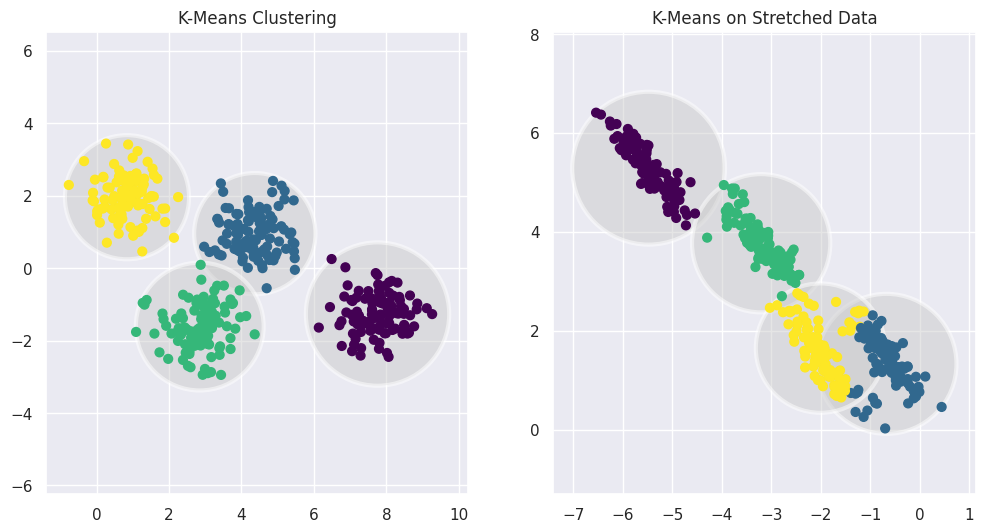

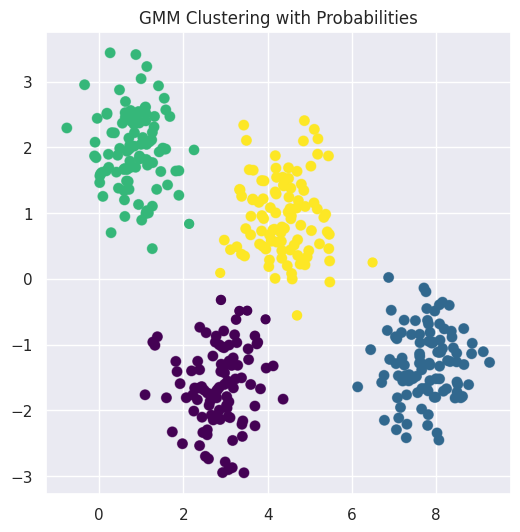

<ipython-input-7-90925142fcbb>:68: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


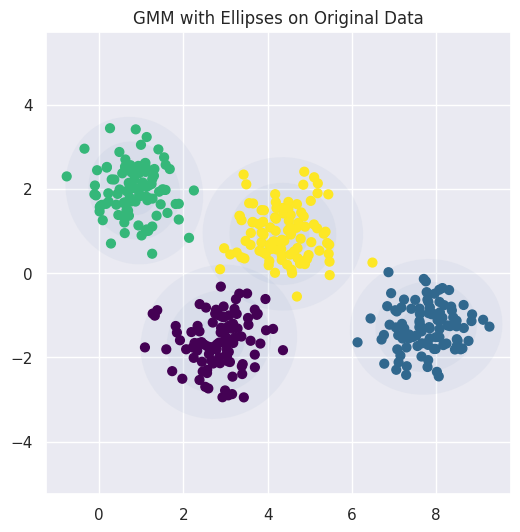

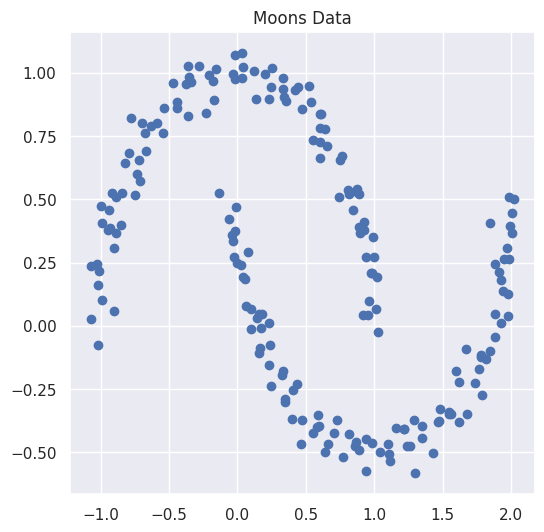

<ipython-input-7-90925142fcbb>:68: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


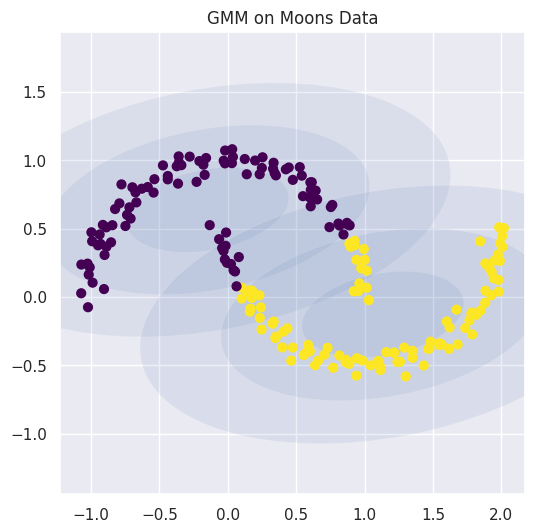

<ipython-input-7-90925142fcbb>:68: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


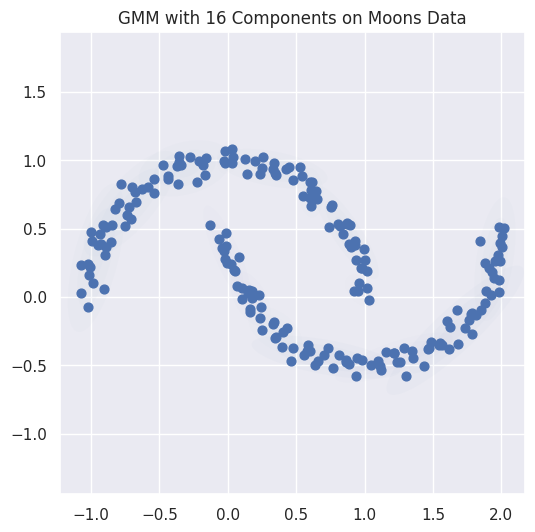

TypeError: BaseMixture.sample() got an unexpected keyword argument 'random_state'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

# Function to plot K-Means results
def plot_kmeans(kmeans, X, n_clusters=4, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # Plot KMeans model representation
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

# Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # Flip axes for better plotting

# Plot K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_kmeans(kmeans, X)
plt.title("K-Means Clustering")

# Stretch the data and re-apply K-Means
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
plt.subplot(122)
plot_kmeans(kmeans, X_stretched)
plt.title("K-Means on Stretched Data")
plt.show()

# Apply Gaussian Mixture Model
gmm = GMM(n_components=4, random_state=42)
labels = gmm.fit(X).predict(X)

# Plot GMM results
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

# Probability of each point belonging to each cluster
probs = gmm.predict_proba(X)
size = 50 * probs.max(1) ** 2  # Emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size, alpha=0.5)
plt.title("GMM Clustering with Probabilities")
plt.show()

# Function to draw ellipses for GMM components
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

# Function to plot GMM results with ellipses
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * 0.2)

# Plot GMM on original data
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plt.figure(figsize=(6, 6))
plot_gmm(gmm, X)
plt.title("GMM with Ellipses on Original Data")
plt.show()

# Generate and plot moons data
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.figure(figsize=(6, 6))
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])
plt.title("Moons Data")
plt.show()

# Apply GMM to moons data
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(6, 6))
plot_gmm(gmm2, Xmoon)
plt.title("GMM on Moons Data")
plt.show()

# GMM with more components on moons data
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plt.figure(figsize=(6, 6))
plot_gmm(gmm16, Xmoon, label=False)
plt.title("GMM with 16 Components on Moons Data")
plt.show()

# Sample new data from GMM
Xnew = gmm16.sample(400, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1])
plt.title("Sampled Data from GMM")
plt.show()
